In [1]:
import networkx as nx
import random

def generate_random_graph(n, p):
    """
    Generates a random undirected graph with n nodes and edge probability p.
    n: Number of nodes in the graph.
    p: Probability of an edge between any pair of nodes.
    :return: A dictionary representation of the random graph.
    """
    G = nx.gnp_random_graph(n, p)
    graph = {node: set(neighbors) for node, neighbors in G.adj.items()}
    return graph

# Example usage
n = 100  # Number of nodes
p = 0.5  # Probability of an edge between any pair of nodes
random_graph = generate_random_graph(n, p)
print(random_graph)


{0: {2, 3, 7, 9, 17, 18, 19, 20, 21, 22, 26, 28, 29, 30, 31, 32, 35, 37, 38, 44, 45, 46, 47, 48, 49, 56, 57, 63, 68, 70, 71, 72, 73, 75, 76, 81, 83, 87, 89, 91, 94, 96, 99}, 1: {2, 6, 7, 9, 14, 17, 18, 19, 20, 21, 23, 26, 28, 30, 31, 32, 33, 36, 37, 42, 43, 47, 49, 50, 53, 56, 57, 58, 59, 60, 62, 63, 66, 67, 69, 70, 72, 76, 77, 80, 81, 82, 83, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99}, 2: {0, 1, 4, 5, 9, 10, 13, 19, 21, 23, 25, 27, 32, 33, 34, 36, 38, 39, 43, 44, 48, 49, 50, 52, 54, 56, 57, 58, 60, 71, 72, 73, 74, 75, 76, 77, 81, 82, 84, 86, 90, 91, 92, 93, 94, 95, 98, 99}, 3: {0, 4, 9, 10, 14, 16, 17, 18, 20, 24, 26, 29, 30, 31, 33, 37, 41, 43, 44, 47, 48, 49, 51, 52, 55, 56, 61, 63, 64, 65, 66, 67, 68, 70, 71, 73, 76, 77, 78, 80, 83, 84, 85, 88, 93, 94, 97, 99}, 4: {2, 3, 5, 9, 10, 12, 13, 15, 17, 19, 22, 25, 27, 28, 32, 33, 34, 35, 39, 40, 44, 46, 47, 52, 53, 54, 55, 56, 58, 66, 68, 69, 71, 72, 73, 75, 76, 77, 81, 83, 85, 86, 88, 89, 90, 93, 94, 98, 99}, 5: {2, 4, 7, 8, 9, 11,

In [2]:
import itertools

def is_clique(nodes, graph):
    for u, v in itertools.combinations(nodes, 2):
        if v not in graph[u]:
            return False
    return True

def contains_k_clique_bruteforce(graph, k):
    nodes = graph.keys()
    for combination in itertools.combinations(nodes, k):
        if is_clique(combination, graph):
            return True
    return False


In [ ]:
k = 8
result = contains_k_clique_bruteforce(random_graph,k)
print(result)

KeyboardInterrupt: ignored

In [3]:
def greedy_k_clique(graph, k):
    # Initialize empty clique
    clique = set()

    # Start with a node of highest degree
    start = max(graph, key=lambda node: len(graph[node]))
    clique.add(start)

    while len(clique) < k:
        # Select a node that is connected to all nodes in the clique and has the highest degree
        next_node = None
        max_degree = -1
        for node in graph:
            if node not in clique and all(neighbor in graph[node] for neighbor in clique):
                if len(graph[node]) > max_degree:
                    max_degree = len(graph[node])
                    next_node = node

        # If no such node is found, then no k-clique exists
        if next_node is None:
            return None

        # Add the selected node to the clique
        clique.add(next_node)

    return clique


In [4]:
k = 8
result = greedy_k_clique(random_graph,k)
print(result)

{1, 97, 66, 7, 43, 47, 19, 59}


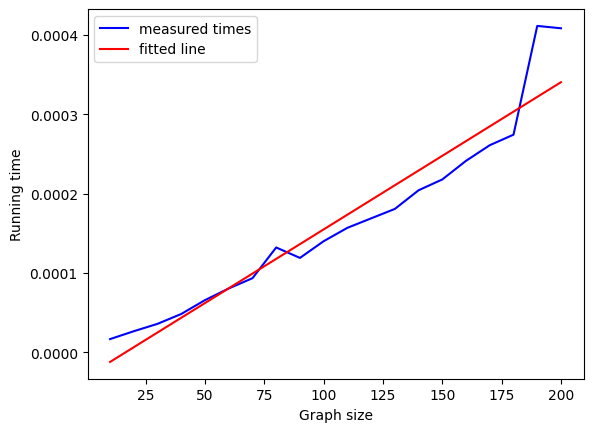

Graph size: 10
Mean run time: 1.6560119993300758e-05
Standard deviation of run times: 6.759645608963692e-06
Standard error: 1.5115027085450777e-06
95% Confidence interval: (1.3597574684552406e-05, 1.952266530204911e-05)

Graph size: 20
Mean run time: 2.6497009987451747e-05
Standard deviation of run times: 6.29190304414878e-06
Standard error: 1.4069122914554533e-06
95% Confidence interval: (2.3739461896199058e-05, 2.9254558078704436e-05)

Graph size: 30
Mean run time: 3.579344999479872e-05
Standard deviation of run times: 1.3318802175912873e-06
Standard error: 2.978174704421329e-07
95% Confidence interval: (3.520972775273214e-05, 3.63771722368653e-05)

Graph size: 40
Mean run time: 4.822396999088596e-05
Standard deviation of run times: 4.296321232945666e-06
Standard error: 9.60686633004222e-07
95% Confidence interval: (4.6341024190197685e-05, 5.010691579157424e-05)

Graph size: 50
Mean run time: 6.570073001284982e-05
Standard deviation of run times: 1.5459100704461035e-05
Standard error

In [18]:
import timeit
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def time_k_clique(graph, k):
    start = timeit.default_timer()
    clique = greedy_k_clique(graph, k)
    end = timeit.default_timer()
    return end - start

graph_sizes = range(10, 201, 10)

average_times = []
std_devs = []
standard_errors = []
confidence_intervals = []

for size in graph_sizes:
    times = []
    for _ in range(100):
        graph = generate_random_graph(size, 0.5)
        time = time_k_clique(graph, 3)  # Let's say we're looking for 3-cliques
        times.append(time)

    # Calculate mean, standard deviation, standard error and confidence interval for each size
    mean_time = np.mean(times)
    std_dev = np.std(times)
    standard_error = std_dev / np.sqrt(len(graph_sizes))
    confidence_interval = (mean_time - 1.96 * standard_error, mean_time + 1.96 * standard_error)

    average_times.append(mean_time)
    std_devs.append(std_dev)
    standard_errors.append(standard_error)
    confidence_intervals.append(confidence_interval)

graph_sizes_np = np.array(list(graph_sizes))

# Fit a 2nd degree polynomial to the data
coeffs = np.polyfit(graph_sizes_np, average_times, 1)

# This creates a polynomial function with the fitted coefficients
fit_func = np.poly1d(coeffs)

plt.plot(graph_sizes_np, average_times, 'b-', label='measured times')
plt.plot(graph_sizes_np, fit_func(graph_sizes_np), 'r-', label='fitted line')
plt.xlabel('Graph size')
plt.ylabel('Running time')
plt.legend()
plt.show()

# Print mean, standard deviation, standard error and confidence interval for each size
for i, size in enumerate(graph_sizes):
    print(f"Graph size: {size}")
    print(f"Mean run time: {average_times[i]}")
    print(f"Standard deviation of run times: {std_devs[i]}")
    print(f"Standard error: {standard_errors[i]}")
    print(f"95% Confidence interval: {confidence_intervals[i]}\n")


heuristic_results:  [False, False, True, True, False, True, True, True, True, True]
brute_force_results:  [False, True, True, True, True, True, True, True, True, True]


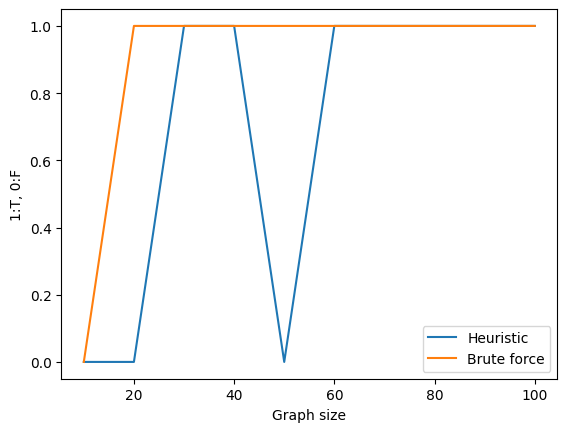

In [ ]:
graph_sizes = range(10, 101, 10)
heuristic_results = []
brute_force_results = []

for size in graph_sizes:
    # Generate a random graph
    graph = generate_random_graph(size, 0.5)

    # Run the heuristic algorithm
    heuristic_clique = greedy_k_clique(graph, 6)
    heuristic_results.append(heuristic_clique != None)

    # Run the brute force algorithm
    brute_force_clique = contains_k_clique_bruteforce(graph,6)
    brute_force_results.append(brute_force_clique)

print("heuristic_results: ", heuristic_results)
print("brute_force_results: ", brute_force_results)

# Now plot the results
plt.plot(graph_sizes, heuristic_results, label='Heuristic')
plt.plot(graph_sizes, brute_force_results, label='Brute force')
plt.xlabel('Graph size')
plt.ylabel('1:T, 0:F')
plt.legend()
plt.show()


In [ ]:
import unittest

class TestKcliqueAlgorithms(unittest.TestCase):
    def test_greedy_k_clique(self):
        # Create a simple graph with a 3-clique
        graph = {1: {2, 3}, 2: {1, 3}, 3: {1, 2}, 4: {5}, 5: {4}}

        clique = greedy_k_clique(graph, 3)
        self.assertEqual(set(clique), {1, 2, 3})

    def test_greedy_k_clique_empty_graph(self):
        # Create an empty graph
        graph = {1: set(), 2: set(), 3: set()}

        clique = greedy_k_clique(graph, 3)
        self.assertEqual(clique, None)

    def test_greedy_k_clique_isolated_nodes(self):
        # Create a graph with only isolated nodes
        graph = {1: set(), 2: set(), 3: set()}

        clique = greedy_k_clique(graph, 3)
        self.assertEqual(clique, None)

    def test_greedy_k_clique_larger_clique(self):
        # Create a graph with a 5-clique
        graph = {1: {2, 3, 4, 5}, 2: {1, 3, 4, 5}, 3: {1, 2, 4, 5}, 4: {1, 2, 3, 5}, 5: {1, 2, 3, 4}}

        clique = greedy_k_clique(graph, 5)
        self.assertEqual(set(clique), {1, 2, 3, 4, 5})

    def test_greedy_k_clique_multiple_cliques(self):
        # Create a graph with two 3-cliques: {1, 2, 3} and {4, 5, 6}
        graph = {1: {2, 3}, 2: {1, 3}, 3: {1, 2}, 4: {5, 6}, 5: {4, 6}, 6: {4, 5}}

        clique = greedy_k_clique(graph, 3)
        self.assertTrue(set(clique) == {1, 2, 3} or set(clique) == {4, 5, 6})


suite = unittest.TestLoader().loadTestsFromTestCase(TestKcliqueAlgorithms)
unittest.TextTestRunner().run(suite)


.....
----------------------------------------------------------------------
Ran 5 tests in 0.010s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>